In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston #inbuilt dataset

In [2]:
#boston housing is inbuilt datasset
boston=load_boston()

#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset=boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)
a=len(boston.feature_names)
a

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


13

In [44]:
#reshaping data
data=dataset[:,12].reshape(-1,1)

In [45]:
#shape of the data
np.shape(dataset)

(506, 13)

In [46]:
#target value
target=boston.target.reshape(-1,1)
np.shape(target)

(506, 1)

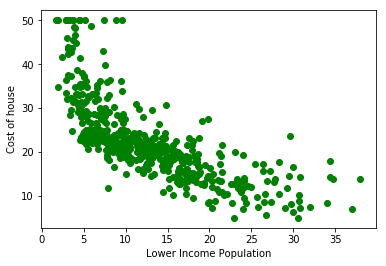

In [47]:
#shape of target
%matplotlib inline
plt.scatter(data,target,color='g')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of house')
plt.show()

In [48]:
#regression
from sklearn.linear_model import LinearRegression

#creating a linear regression model
reg=LinearRegression()

#fit the model
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
#prediction
pred=reg.predict(data)

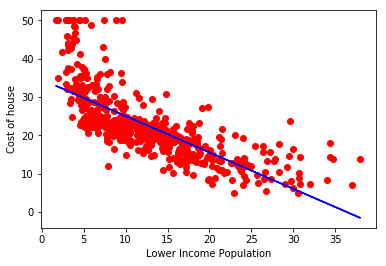

In [50]:

%matplotlib inline
plt.scatter(data,target,color='r')
plt.plot(data,pred,color='b')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of house')
plt.show()

In [59]:
#use polynomial model
from sklearn.preprocessing import PolynomialFeatures

#to allow merging of linear and poly models for curve 
from sklearn.pipeline import make_pipeline

#make pipeline
model=make_pipeline(PolynomialFeatures(7),reg)

#fitting
model.fit(data,target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [60]:
pred=model.predict(data)

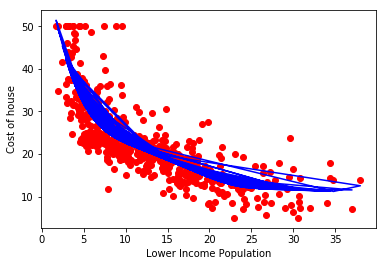

In [61]:
%matplotlib inline
plt.scatter(data,target,color='r')
plt.plot(data,pred,color='b')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of house')
plt.show()

In [62]:
#Accuracy using Rsquared metric
from sklearn.metrics import r2_score
r2_score(pred,target) #ranges(-1 to 1)

0.5353775172322914